# 0.1 Bibliotheken installieren und importieren

In [1]:
# Bibliothek installieren (auskommentieren)
#pip install pandas
# falls syntax error entsteht : nicht beachten!

In [2]:
# Bibliothek importieren
import pandas as pd
# falls modul nicht geladen werden konnte, müssen 
# Sie prüfen ob die Bibliothek richtig installiert wurde

In [3]:
# Bibliothek installieren (auskommentieren)
#pip install numpy
# falls syntax error entsteht : nicht beachten!

In [4]:
# Bibliothek importieren
import numpy as np
# falls modul nicht geladen werden konnte, müssen 
# Sie prüfen ob die Bibliothek richtig installiert wurde

In [5]:
# Bibliothek installieren (auskommentieren)
#pip install matplotlib
# falls syntax error entsteht : nicht beachten!

In [6]:
# Bibliothek importieren
import matplotlib.pyplot as plt
# falls modul nicht geladen werden konnte, müssen 
# Sie prüfen ob die Bibliothek richtig installiert wurde

In [7]:
# Bibliothek installieren (auskommentieren)
#pip install tensorflow
# falls syntax error entsteht : nicht beachten!

In [8]:
# Bibliothek importieren
import tensorflow as tf
# Modelle aus tensorflow importieren
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout, Layer
from tensorflow.keras.utils import to_categorical, plot_model
# falls modul nicht geladen werden konnte, müssen 
# Sie prüfen ob die Bibliothek richtig installiert wurde

In [9]:
# Bibliothek installieren (auskommentieren)
#pip install sklearn
# falls syntax error entsteht : nicht beachten!

In [10]:
# Modelle aus Sklearn importieren
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
# falls modul nicht geladen werden konnte, müssen 
# Sie prüfen ob die Bibliothek richtig installiert wurde

In [11]:
# Bibliothek installieren (auskommentieren)
#pip install tensorflow-datasets
# falls syntax error entsteht : nicht beachten!

In [12]:
# Bibliothek importieren
import tensorflow_datasets as tfds
# falls modul nicht geladen werden konnte, müssen 
# Sie prüfen ob die Bibliothek richtig installiert wurde

# 1. Business Understanding

Online-Versandhändler haben oft eine hohe Rückläuferquote. Diese Rückläuferquote kommt zum Beispiel durch den Kauf von Artikeln in verschiedenen Größen zustande. Die nicht passenden Größen werden dann vom Käufer wieder zurückgesendet. Unter diese Versandhändler fällt, mit einer Rückläuferquote von bis zu 50%, auch das Unternehmen Zalando. Dabei müssen 97% der zurückgesendeten Produkte wieder eingelagert und verkauft werden. Für den erneuten Verkauf werden die Produkte, in diesem Betrachtungsfall Klamotten, identifiziert, gelabelt und bei Bedarf wieder eingelagert. Das Unternehmen Zalando verschickte im Jahr 2019 rund 186 Millionen Bestellungen. Wenn man davon ausgeht, dass eine Bestellung 4 Artikel beinhaltet und 50% der Bestellungen wieder zurückgesendet werden, ergibt das 372 Millionen Artikel, die wieder neu gelabelt und eingelagert werden müssen.

Die Unterstützung und Optimierung der Rückläuferbearbeitung, kann zum Beispiel durch eine AI gestützte Klassifikation gewährleistet werden. Mit diesem Ansatz kann dann die zu einem Artikel zugehörige Kategorie, auf Basis von Bildern, bestimmt werden. Damit ergibt sich die Frage- bzw. Problemstellung, inwiefern können Machine Learning Algorithmen bei der Klassifizierung von Bildern einzelner Kleidungsstücke unterstützen?

# 2. Data Understanding

## 2.1 Daten lesen

In [13]:
# Pfade der trainingsdaten und testdaten
csv_file_train = "../data/fashion-mnist_train.csv"
csv_file_test = "../data/fashion-mnist_test.csv"

# lesen der CSV-Datei mit panda Bibliothek
df_train = pd.read_csv(csv_file_train) 
df_test = pd.read_csv(csv_file_test)
# unterteilt in (dataframe = df)_training und test

# erstelle copien
df_train_copy = df_train.copy()
df_test_copy = df_test.copy()


## 2.2 Daten Analyse

In [14]:
# trainingsdaten beschreiben
df_train.describe()

label        pixel1        pixel2        pixel3        pixel4  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       4.500000      0.000900      0.006150      0.035333      0.101933   
std        2.872305      0.094689      0.271011      1.222324      2.452871   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000      0.000000      0.000000      0.000000      0.000000   
50%        4.500000      0.000000      0.000000      0.000000      0.000000   
75%        7.000000      0.000000      0.000000      0.000000      0.000000   
max        9.000000     16.000000     36.000000    226.000000    164.000000   

             pixel5        pixel6        pixel7        pixel8        pixel9  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       0.247967      0.411467      0.805767      2.198283      5.682000   
std        4.306912      5.836188      8.215169     14.093378     23.819481   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max      227.000000    230.000000    224.000000    255.000000    254.000000   

       ...      pixel775      pixel776      pixel777      pixel778  \
count  ...  60000.000000  60000.000000  60000.000000  60000.000000   
mean   ...     34.625400     23.300683     16.588267     17.869433   
std    ...     57.545242     48.854427     41.979611     43.966032   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...     58.000000      9.000000      0.000000      0.000000   
max    ...    255.000000    255.000000    255.000000    255.000000   

           pixel779      pixel780      pixel781      pixel782      pixel783  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean      22.814817     17.911483      8.520633      2.753300      0.855517   
std       51.830477     45.149388     29.614859     17.397652      9.356960   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max      255.000000    255.000000    255.000000    255.000000    255.000000   

          pixel784  
count  60000.00000  
mean       0.07025  
std        2.12587  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        0.00000  
max      170.00000  

[8 rows x 785 columns]

In [15]:
# testdaten beschreiben
df_test.describe()

label        pixel1        pixel2        pixel3        pixel4  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       4.500000      0.000400      0.010300      0.052100      0.077000   
std        2.872425      0.024493      0.525187      2.494315      2.208882   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000      0.000000      0.000000      0.000000      0.000000   
50%        4.500000      0.000000      0.000000      0.000000      0.000000   
75%        7.000000      0.000000      0.000000      0.000000      0.000000   
max        9.000000      2.000000     45.000000    218.000000    185.000000   

             pixel5        pixel6        pixel7        pixel8        pixel9  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       0.208600      0.349200      0.826700      2.321200      5.457800   
std        4.669183      5.657849      8.591731     15.031508     23.359019   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max      227.000000    223.000000    247.000000    218.000000    244.000000   

       ...      pixel775      pixel776      pixel777      pixel778  \
count  ...  10000.000000  10000.000000  10000.000000  10000.000000   
mean   ...     34.320800     23.071900     16.432000     17.870600   
std    ...     57.888679     49.049749     42.159665     44.140552   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...     55.000000      6.000000      0.000000      0.000000   
max    ...    254.000000    252.000000    255.000000    255.000000   

           pixel779      pixel780      pixel781      pixel782      pixel783  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      22.860000     17.790200      8.353500      2.541600      0.629500   
std       51.706601     45.128107     28.765769     16.417363      7.462533   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        1.000000      0.000000      0.000000      0.000000      0.000000   
max      255.000000    255.000000    240.000000    225.000000    205.000000   

          pixel784  
count  10000.00000  
mean       0.06560  
std        1.93403  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        0.00000  
max      107.00000  

[8 rows x 785 columns]

Der für diese Arbeit gewählte Datensatz heißt Fashion MNIST und wurde im Jahr 2017 von dem Unternehmen Zalando veröffentlicht. Der Datensatz steht in einer GitHub Repository zur Verfügung und ist frei zugänglich. 

Er beinhaltet Zalando-Artikelbilder, die in zwei Datensätze aufgeteilt sind. Der erste Satz (df_train) enthält 60.000 Beispiele, die für das Training verwendet werden und der zweite Satz (df_test) 10.000 Beispiele, die für das Testen verwendet werden. 

Jedes Beispiel, welches jeweils ein Bild darstellt, ist ein 28x28 Graustufenbild. Jedem Bild wird dabei noch ein Label zugeordnet.

In [16]:
# alle spalten (Attribute)
print("Datensatz Attribute:") 
print("--------------------------------")
for col in df_train.columns:
    print(col)
print("--------------------------------")

Datensatz Attribute:
--------------------------------
label
pixel1
pixel2
pixel3
pixel4
pixel5
pixel6
pixel7
pixel8
pixel9
pixel10
pixel11
pixel12
pixel13
pixel14
pixel15
pixel16
pixel17
pixel18
pixel19
pixel20
pixel21
pixel22
pixel23
pixel24
pixel25
pixel26
pixel27
pixel28
pixel29
pixel30
pixel31
pixel32
pixel33
pixel34
pixel35
pixel36
pixel37
pixel38
pixel39
pixel40
pixel41
pixel42
pixel43
pixel44
pixel45
pixel46
pixel47
pixel48
pixel49
pixel50
pixel51
pixel52
pixel53
pixel54
pixel55
pixel56
pixel57
pixel58
pixel59
pixel60
pixel61
pixel62
pixel63
pixel64
pixel65
pixel66
pixel67
pixel68
pixel69
pixel70
pixel71
pixel72
pixel73
pixel74
pixel75
pixel76
pixel77
pixel78
pixel79
pixel80
pixel81
pixel82
pixel83
pixel84
pixel85
pixel86
pixel87
pixel88
pixel89
pixel90
pixel91
pixel92
pixel93
pixel94
pixel95
pixel96
pixel97
pixel98
pixel99
pixel100
pixel101
pixel102
pixel103
pixel104
pixel105
pixel106
pixel107
pixel108
pixel109
pixel110
pixel111
pixel112
pixel113
pixel114
pixel115
pixel116
pixe

Ein Label repräsentiert eins der 10 Klassen, wobei jede Klasse eine Artikelkategorie darstellt. 

In [17]:
# diese 10 Klassen definieren wir im Array
klassen_name = ['Top','Trouser','Pullover','Dress','Coat',
               'Sandal','Shirt','Sneaker','Bag','Ankle boot']

In der folgenden Abbildung ist eine Übersicht des Datensatzes bzw. der Bilder zu sehen. Dabei werden pro Klasse drei Zeilen beansprucht.

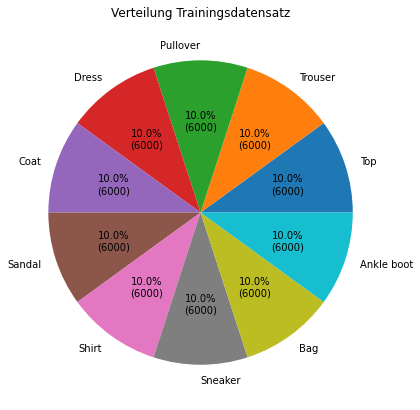

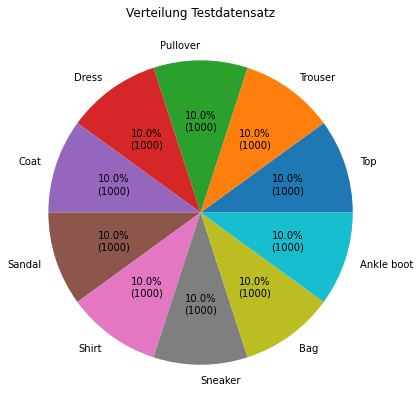

In [18]:
# function zur erstellung der Labelnamen im Diagram
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

def plot_pie(title, data):
    # plot erstellen
    fig, ax = plt.subplots(figsize =(10, 7))
    plt.pie(data, autopct = lambda pct: func(pct, data), labels = klassen_name)
    ax.set_title(title)
    # plot anzeigen
    plt.show()

# plote die trainingdaten 
plot_pie("Verteilung Trainingsdatensatz", df_train["label"].value_counts())
# plote die testdaten
plot_pie("Verteilung Testdatensatz", df_test["label"].value_counts())

Der Trainings- als auch der Testdatensatz ist ziemlich ausgeglichen. In jedem Satz ist jede Kategorie mit ca. 10\% vertreten, was in den nächsten Abbildungen zu sehen ist.

Aufgrund der Ausgeglichenheit der Daten müssen im Rahmen der Data Preparation keine großen Änderungen oder Vorbereitungen vorgenommen werden.

<Figure size 720x720 with 0 Axes>

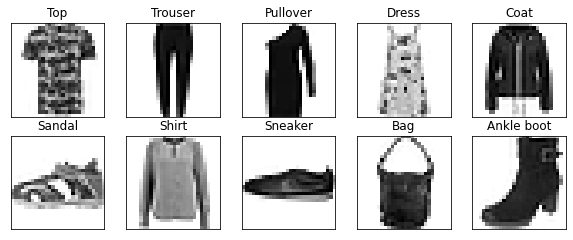

In [19]:
# ploten der einzelnen Klassen als Bild
# plot größe definieren 
plt.figure(figsize=(10,10))
# trenne label von restliche Attribute
# um die Zielvariable von den Datensatzen zu entfernen

# trainingsdatensatz wird in zweil datensätze geteilt
# eines der Datensätze beinhaltet die label(klassen) werte (Zielvariable)
y_train = df_train.pop('label').to_numpy()
# der andere Datensatz beinhaltet  (28x28=784) die pixel werte
x_train = df_train.to_numpy()

# ein beispiel der Datensatz anhand ein bild zeigen
image = x_train[0].reshape((28,28)) / 255.0

# set size of plot
plt.figure(figsize=(10,10))

tempI = 0
for index in range(len(x_train)):
    klasse = y_train[index]
    img = x_train[index] / 255.0
    if klasse == tempI:
        img = img.reshape((28,28))
        plt.subplot(5,5,tempI+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(img, cmap=plt.cm.binary)
        plt.title(klassen_name[klasse])
        tempI += 1
    if tempI == 10:
        break
plt.show()

Jedes der oben abegbildeten Element stellen eine Klasse (label) da. Jede einzelne Zeile aus dem Datensatz stellt eine dieser Klassen dar, diese können jedoch untereinander varieren. Dazu sehen wir ein weiters Beispiel aus dem Datensatz der zu Klasse Ankle Boot gehört.

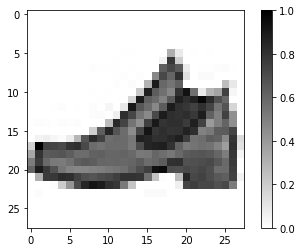

In [20]:
# aus der Traindaten holen wir ein weiters beispeil zu klasse Ankle Boot aus dem index 1
# und formen die pixel angaben um.
image = x_train[1].reshape((28,28)) / 255.0

# plot erstellen
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
# plot anzeigen
plt.show()

# 3. Data preperation

## 3.1. Definiere Test- und Trainingsdaten

In [21]:
#validierungsdaten trainsplit
df_train, df_val = train_test_split(df_train_copy, test_size=0.1, random_state=250)

# zunächst definieren wir unsere trainingsdaten aus den trainingsplit
y_train = df_train.pop('label').to_numpy() # Zielvariable
x_train = df_train.to_numpy() # Pixelwerte

# validierungsdaten definieren
y_val = df_val.pop('label').to_numpy() # Zielvariable
x_val = df_val.to_numpy() # Pixelwerte

# als nächstes definieren wir unsere testdaten
y_test = df_test_copy.pop('label').to_numpy()
x_test = df_test_copy.to_numpy()

print(f"{len(df_train)} train examples")
print(f"{len(df_val)} validation examples")
print(f"{len(df_test)} test examples")

54000 train examples
6000 validation examples
10000 test examples


## 3.2. Merkmalsskaliereung (feature-scaling)

In [22]:
# normalisierung der trainingsdaten

# da wir wissen es handelt sich hierbei um graustufen 
# die zwischen 0 bis 255 sein kann
x_train = x_train / 255.0 

# normalisierung der validierungsdaten
x_val = x_val / 255.0

# normalisierung der testdaten
x_test = x_test / 255.0

Da die pixeln ein wert zwischen 0 bis 255 sein kann, teilen wir diese werte durch 255 um eine zahl zwischen 0 bis 1 daraus zu machen. (Normalisierung)

In [23]:
# Nun probieren wir die 784 pixlen angaben auf 28x28 pixlen umzuformen
# dazu definierein wir erstmal die zeilen und spalten
imgRow = 28
imgCol = 28
# die umformung definieren
imgUmformen = (imgRow, imgCol, 1)

# umformen der 784 spalten zu 28 Zeilen und 28 Spalten (28x28)
x_train = x_train.reshape(x_train.shape[0], * imgUmformen)
x_test = x_test.reshape(x_test.shape[0], * imgUmformen)
x_val = x_val.reshape(x_val.shape[0], * imgUmformen)

Als nächstes formen wir unsere Zielvariabel (y_train, y_test) zu einem Kategorischen Matrix.

In [24]:
# hierzu verwenden wir den Bibliotheken tensorflow das modul tensorflow.keras.utils
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
y_val = to_categorical(y_val, 10)

Zur kontrolle lassen wir die Dimension unseren datensätze anzeigen.

In [25]:
print("X_TRAIN: " , x_train.shape)
print("X_VAL: " , x_val.shape)
print("X_TEST: " , x_test.shape)
print("Y_TRAIN: " , y_train.shape)
print("Y_VAL: " , y_val.shape)
print("Y_TEST: " , y_test.shape)

X_TRAIN:  (54000, 28, 28, 1)
X_VAL:  (6000, 28, 28, 1)
X_TEST:  (10000, 28, 28, 1)
Y_TRAIN:  (54000, 10)
Y_VAL:  (6000, 10)
Y_TEST:  (10000, 10)


Die Daten sind soweit vorbereit, dass wir unseren ersten anlauf nehmen können.

# 4.Modellierung

Wir erstell zunächst ein ganz simpeln CNN-Model. Dazu definieren wir unsere Layers wie auf der Ausarbeitung beschrieben wurde.

    Convolutional Layer     = Conv2D
    --------------------------------------
    Pooling Layer           = MaxPooling2D
    --------------------------------------
    Fully-Connected Layer   = Dense
    --------------------------------------



In [26]:
# Das modell initalizieren
model = Sequential()
# fügen die 1. Convolutional layer mit input 28x28 dazu
model.add(Conv2D(filters=32,kernel_size=3, activation='relu', padding='same', input_shape=(28, 28,1)))
# fügen die Pooling Layer dazu
model.add(MaxPooling2D(pool_size=(2, 2)))
# fügen 2. Convultional layer dazu
model.add(Conv2D(filters=32,kernel_size=3,padding='same', activation='relu'))
# fügen die Pooling Layer dazu
model.add(MaxPooling2D(pool_size=(2, 2)))
# flatten=Faltung (fasst die mehrdimensionale Matrix in eine liste zusammen) (nötig für kompatibilibität)
model.add(Flatten())
# und die fully-connected layer
#model.add(Dropout(0.50))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
# schließ das modell
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [27]:
# model compilen 
model.compile(
    optimizer=tf.keras.optimizers.Adam(), 
    loss= tf.keras.losses.categorical_crossentropy, 
    metrics=['accuracy']
)

In [28]:
# Epoche anzahl definieren 10
NUM_EPOCHS = 10
# batch größe definieren 
BATCH_SIZE = 64

# Fit the model, 
# specify the training 
# data
# the total number of epochs
# and the validation data we just created 
history = model.fit(
    x_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=NUM_EPOCHS,
    validation_data=(x_val, y_val), 
    validation_steps=10,
    verbose =2
)

Epoch 1/10
844/844 - 15s - loss: 0.4821 - accuracy: 0.8254 - val_loss: 0.3670 - val_accuracy: 0.8813 - 15s/epoch - 18ms/step
Epoch 2/10
844/844 - 15s - loss: 0.3096 - accuracy: 0.8881 - val_loss: 0.3161 - val_accuracy: 0.8906 - 15s/epoch - 17ms/step
Epoch 3/10
844/844 - 15s - loss: 0.2675 - accuracy: 0.9022 - val_loss: 0.2975 - val_accuracy: 0.8922 - 15s/epoch - 17ms/step
Epoch 4/10
844/844 - 14s - loss: 0.2350 - accuracy: 0.9150 - val_loss: 0.2647 - val_accuracy: 0.9047 - 14s/epoch - 17ms/step
Epoch 5/10
844/844 - 14s - loss: 0.2155 - accuracy: 0.9207 - val_loss: 0.2298 - val_accuracy: 0.9156 - 14s/epoch - 17ms/step
Epoch 6/10
844/844 - 14s - loss: 0.1903 - accuracy: 0.9305 - val_loss: 0.2464 - val_accuracy: 0.9125 - 14s/epoch - 17ms/step
Epoch 7/10
844/844 - 14s - loss: 0.1749 - accuracy: 0.9355 - val_loss: 0.2379 - val_accuracy: 0.9141 - 14s/epoch - 17ms/step
Epoch 8/10
844/844 - 15s - loss: 0.1571 - accuracy: 0.9417 - val_loss: 0.2192 - val_accuracy: 0.9203 - 15s/epoch - 17ms/step


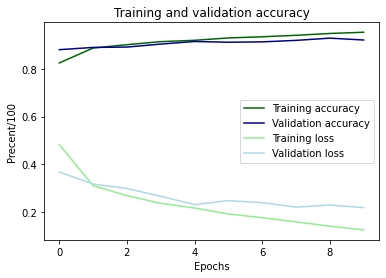

<Figure size 432x288 with 0 Axes>

In [32]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))

plt.plot(epochs, acc, "darkgreen", label="Training accuracy")
plt.plot(epochs, val_acc, "darkblue", label="Validation accuracy")
plt.plot(epochs, loss, "lightgreen", label="Training loss")
plt.plot(epochs, val_loss, "lightblue", label="Validation loss")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Precent/100")
plt.legend(loc=0)
plt.figure()


plt.show()

In [33]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

In [34]:
predicted_classes = (model.predict(x_test) > 0.5).astype("int32")
print(classification_report(y_test, predicted_classes, target_names=klassen_name))

              precision    recall  f1-score   support

         Top       0.84      0.90      0.87      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.90      0.88      0.89      1000
       Dress       0.96      0.91      0.94      1000
        Coat       0.87      0.89      0.88      1000
      Sandal       1.00      0.97      0.98      1000
       Shirt       0.86      0.70      0.77      1000
     Sneaker       0.95      0.98      0.96      1000
         Bag       0.99      0.98      0.99      1000
  Ankle boot       0.97      0.97      0.97      1000

   micro avg       0.93      0.92      0.92     10000
   macro avg       0.93      0.92      0.92     10000
weighted avg       0.93      0.92      0.92     10000
 samples avg       0.92      0.92      0.92     10000



C:\Users\HK5575\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
